In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits 
mnist= load_digits()

In [4]:
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
dir(mnist)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [16]:
len(mnist.images)

1797

In [17]:
len(mnist.target)

1797

In [9]:
mnist.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 1797\n:Number of Attributes: 64\n:Attribute Information: 8x8 image of integer pixels in the range 0..16.\n:Missing Attribute Values: None\n:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n:Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted in each bl

In [6]:
len(mnist.target)

1797

In [11]:
img= mnist.images[0]

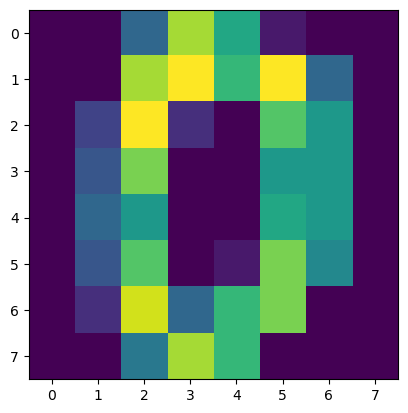

In [12]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [13]:
type(img)

numpy.ndarray

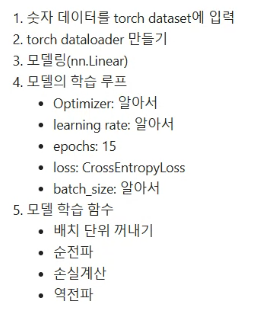

In [358]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits 

mnist= load_digits()
x_train, x_test, y_train, y_test = train_test_split(mnist.images, mnist.target)

In [359]:
# Dataset 상속
class CustomDataset(Dataset): 
  def __init__(self): 
    self.x_data = x_train
    self.y_data = y_train
  # 총 데이터의 개수를 리턴
  def __len__(self): 
    return len(self.x_data)

  def __getitem__(self, idx): 
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.tensor(self.y_data[idx])
    return x, y


In [360]:
dataset= CustomDataset()
dataloader= DataLoader(dataset, batch_size= 64, shuffle= True)

In [361]:
for i, data in enumerate(dataloader): 
    print(i, data)

0 [tensor([[[ 0.,  0.,  2.,  ..., 12.,  0.,  0.],
         [ 0.,  0., 12.,  ..., 15.,  1.,  0.],
         [ 0.,  4., 14.,  ...,  6.,  6.,  0.],
         ...,
         [ 0.,  3., 12.,  ...,  5.,  8.,  0.],
         [ 0.,  0., 10.,  ..., 14.,  3.,  0.],
         [ 0.,  0.,  1.,  ...,  8.,  0.,  0.]],

        [[ 0.,  0.,  4.,  ...,  3.,  0.,  0.],
         [ 0.,  0., 10.,  ..., 14.,  1.,  0.],
         [ 0.,  1., 14.,  ..., 13.,  3.,  0.],
         ...,
         [ 0.,  7., 16.,  ..., 16.,  5.,  0.],
         [ 0.,  3., 15.,  ..., 15.,  2.,  0.],
         [ 0.,  0.,  4.,  ...,  2.,  0.,  0.]],

        [[ 0.,  0.,  4.,  ...,  2.,  0.,  0.],
         [ 0.,  2., 15.,  ..., 10.,  0.,  0.],
         [ 0.,  4., 16.,  ..., 15.,  1.,  0.],
         ...,
         [ 0.,  5., 12.,  ..., 11.,  8.,  0.],
         [ 0.,  2., 16.,  ..., 16.,  2.,  0.],
         [ 0.,  0.,  6.,  ...,  8.,  0.,  0.]],

        ...,

        [[ 0.,  0.,  7.,  ...,  1.,  0.,  0.],
         [ 0.,  8., 13.,  ...,  4.,  0.,  

In [362]:
class SimpleClassifier(nn.Module): # torch.nn.Module을 상속받는 파이썬 클래스
    def __init__(self): #
        super().__init__()
        self.linear1 = nn.Linear(64, 32)
        self.relu= nn.ReLU()
        self.linear2= nn.Linear(32, 10)
        self.softmax= nn.LogSoftmax()

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x= self.linear1(x) 
        x= self.relu(x) 
        x= self.linear2(x)
        x= self.softmax(x)

        return x 
model= SimpleClassifier()


print(model)

SimpleClassifier(
  (linear1): Linear(in_features=64, out_features=32, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=32, out_features=10, bias=True)
  (softmax): LogSoftmax(dim=None)
)


In [363]:
optimizer = optim.Adam(model.parameters(), lr=1e-3)
crossloss = nn.CrossEntropyLoss()


In [364]:
epochs = 15
for epoch in range(epochs):
    model.train()
    for idx, batch in enumerate(dataloader):
        x, y_true= batch 
        y_pred = model(x) 
        loss = crossloss(y_pred, y_true) 
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch}/{epochs}, Cost: {loss.item():.6f}')

Epoch 0/15, Cost: 1.074068
Epoch 1/15, Cost: 2.097374
Epoch 2/15, Cost: 1.215910


/home/sdf1ai810/miniconda3/envs/module0/lib/python3.12/site-packages/torch/nn/modules/module.py:1553: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch 3/15, Cost: 0.575434
Epoch 4/15, Cost: 0.438727
Epoch 5/15, Cost: 0.206060
Epoch 6/15, Cost: 0.137231
Epoch 7/15, Cost: 0.048598
Epoch 8/15, Cost: 0.073905
Epoch 9/15, Cost: 0.050790
Epoch 10/15, Cost: 0.059213
Epoch 11/15, Cost: 0.050268
Epoch 12/15, Cost: 0.043276
Epoch 13/15, Cost: 0.003413
Epoch 14/15, Cost: 0.022392


In [381]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.datasets import load_digits

mnist = load_digits()

In [382]:
mnist.data.shape

(1797, 64)

In [383]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test= train_test_split(mnist.data, mnist.target, test_size= 0.3, random_state= 42, stratify= mnist.target)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1257, 64) (540, 64) (1257,) (540,)


In [384]:
class customDataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        self.x = torch.FloatTensor(x)
        self.y = torch.LongTensor(y)
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
train_ds = customDataset(x_train, y_train)
test_ds = customDataset(x_test, y_test)


In [385]:
train_dataloader= torch.utils.data.DataLoader(train_ds, batch_size=32, shuffle=True)

In [392]:

test_dataloader = torch.utils.data.DataLoader(test_ds, batch_size=32, shuffle=True)

In [387]:
class customModel(nn.Module):
    def __init__(self):
        super(customModel, self).__init__()
        self.linear1 = nn.Linear(64, 32)
        self.linear2 = nn.Linear(32, 10)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x
    
model = customModel()
print(model)

customModel(
  (linear1): Linear(in_features=64, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
  (relu): ReLU()
)


In [388]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)
criterion = nn.CrossEntropyLoss()
epochs = 10

def train(model, dataloader, optimizer, loss_func, epochs): 
    losses= []
    for epoch in range(epochs):
        for data, target in dataloader:
            y_pred = model(data)
            loss = loss_func(y_pred, target)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        losses.append(loss.item())    
        if epoch % 10 == 0:
            print(epoch, loss.item())
    return losses

In [389]:
train(model, train_dataloader, optimizer, criterion, epochs)

0 1.1721806526184082


[1.1721806526184082,
 1.011033535003662,
 0.6525561213493347,
 0.4098185896873474,
 0.1962372213602066,
 0.25560739636421204,
 0.17664891481399536,
 0.43467095494270325,
 0.18270128965377808,
 0.20187005400657654]

In [390]:
def evaluate(model, dataloader, loss_func, epochs): 
    losses= []
    for epoch in range(epochs):
        for data, target in dataloader:
            y_pred = model(data)
            loss = loss_func(y_pred, target)
            
        losses.append(loss.item())    
        print(epoch, loss.item())
    return losses

In [393]:
evaluate(model, test_dataloader, criterion, epochs)

0 0.25832808017730713
1 0.48618653416633606
2 0.1343514323234558
3 0.20833727717399597
4 0.13270628452301025
5 0.23137499392032623
6 0.1882961243391037
7 0.25053679943084717
8 0.16754959523677826
9 0.20682574808597565


[0.25832808017730713,
 0.48618653416633606,
 0.1343514323234558,
 0.20833727717399597,
 0.13270628452301025,
 0.23137499392032623,
 0.1882961243391037,
 0.25053679943084717,
 0.16754959523677826,
 0.20682574808597565]